## N is a number of unit cells here!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy as sp

In [2]:
def SSH_hamiltonian_periodic(N1, Delta):
    N = N1*2
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    A[0][N-1] = 1 + Delta
    A[N-1][0] = 1 + Delta
    return A

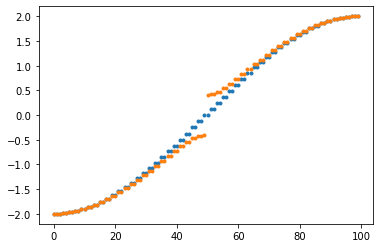

In [3]:
A_SSH = SSH_hamiltonian_periodic(50, 0)
A_SSH1 = SSH_hamiltonian_periodic(50, 0.2)
plt.plot(np.sort(np.linalg.eigvals(A_SSH)), ".")
plt.plot(np.sort(np.linalg.eigvals(A_SSH1)), ".")

In [4]:
def corr_matrix(N1, Delta):
    eps = 1e-15
    eigenvalues, eigenvectors = np.linalg.eigh(SSH_hamiltonian_periodic(N1, Delta))
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    N = N1*2
    Corr_matrix = np.zeros((N,N), dtype = "complex")    
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                Corr_matrix[i][j] += np.conjugate(eigenvectors[:,k][i])*(eigenvectors[:,k][j])
    return Corr_matrix  

In [5]:
def corr_matrix_A(N1, Delta):
    return corr_matrix(N1, Delta)[0:N1, 0:N1]

In [6]:
def entang_entropy_A(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return S

In [7]:
def entang_entropy_A1(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):  
        S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
    return(S)

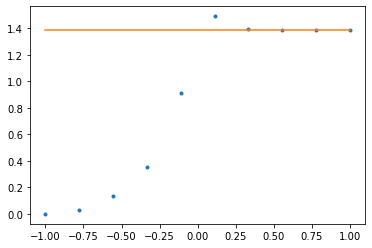

In [8]:
M = 10
N = 50
Delta = np.linspace(-1,1,M)
Entropy_array = np.array([entang_entropy_A(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

# FOURIER Transform

In [9]:
def u_func(k, Delta, N):
    lambda1 = (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)
    s = np.sqrt(lambda1 / np.conjugate(lambda1))
    u1 = -(1/np.sqrt(2))*np.array([-1, s]) 
    u2 = -(1/np.sqrt(2))*np.array([1, s])
    return u1, u2 

Почему u_func не работает? Надо пересчитать! Что там с блоховскими состояниями?

In [10]:
def u_func_new(k, Delta, N):
    H = np.array([[0, (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)],[(1 - Delta) + (1 + Delta)*np.exp((2*np.pi/N)*1j*k), 0]])
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvectors

In [11]:
N = 8
for k in range(N):
    print(u_func_new(k, 0.2, N)[:,0])

[-0.70710678+0.j  0.70710678+0.j]
[-0.70710678-0.j          0.6287107 +0.32360911j]
[-0.70710678-0.j          0.39223227+0.58834841j]
[-0.70710678+0.j         -0.04037414+0.70595321j]
[-0.70710678+0.00000000e+00j -0.70710678+2.59786817e-16j]
[-0.70710678+0.j         -0.04037414-0.70595321j]
[-0.70710678-0.j          0.39223227-0.58834841j]
[-0.70710678-0.j          0.6287107 -0.32360911j]


In [12]:
for k in range(6):
    print(np.exp(1j*2*np.pi*k/N)/np.sqrt(2))

(0.7071067811865475+0j)
(0.5+0.5j)
(4.329780281177466e-17+0.7071067811865475j)
(-0.4999999999999999+0.5j)
(-0.7071067811865475+8.659560562354932e-17j)
(-0.5000000000000001-0.4999999999999999j)


In [13]:
def corr_matrix_new(N1, Delta):
    N = N1*2
    eps = 1e-15
    C = np.zeros((N,N),dtype = "complex")
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                    C[i][j] += (1/N1)*np.conjugate(u_func_new(k, Delta, N1)[:,0][i%2])*np.exp(-(2*np.pi/N1)*1j*k*(i//2 - j//2))*u_func_new(k, Delta, N1)[:,0][j%2]
    return C

In [14]:
C = corr_matrix_A(10, 0.05)
eigenvalues = np.linalg.eigvalsh(C)
idx = eigenvalues.argsort()[::1]   
eigenvalues = eigenvalues[idx]
print(eigenvalues)
print(eigenvalues[-3-1] + eigenvalues[3])

[2.29795828e-07 2.29795828e-07 3.21659367e-03 3.21659367e-03
 5.00000000e-01 5.00000000e-01 9.96783406e-01 9.96783406e-01
 9.99999770e-01 9.99999770e-01]
0.9999999999999986


In [15]:
def corr_matrix_A_new(N, Delta):
    return corr_matrix_new(N, Delta)[0:N, 0:N]

In [16]:
def entang_entropy_A_new(N, Delta):
    CM = corr_matrix_A_new(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

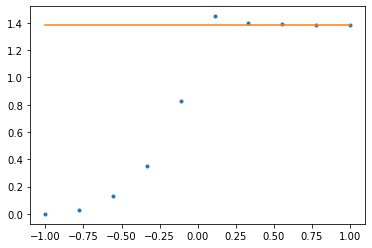

In [17]:
M = 10
N = 10
Delta = np.linspace(-1,1,M)
Entropy_array_new = np.array([entang_entropy_A_new(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array_new, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

In [18]:
#symmetry of the correlation matrix A

Num = 50
Delta = 0.9
S = corr_matrix_A(Num, Delta)
S_eigvals = np.linalg.eigvalsh(S)
S_new = []
for i in range(Num//2):
    S_new.append(S_eigvals[i] + S_eigvals[-i-1])
S_new = np.array(S_new)
print("S old = ", S_eigvals)
print("S new = ", S_new)

S old =  [-5.23391544e-16 -4.97914811e-16 -3.70224246e-16 -3.51218758e-16
 -3.01493660e-16 -2.38743418e-16 -1.97888462e-16 -1.53922413e-16
 -1.03857259e-16 -9.75506218e-17 -6.43654685e-17 -1.74359356e-18
  2.53029130e-17  6.79349035e-17  1.06274189e-16  1.19095519e-16
  1.79403206e-16  2.83508849e-16  2.92488284e-16  3.45218662e-16
  6.93887087e-16  8.16081279e-16  3.00573026e-08  3.00573028e-08
  5.00000000e-01  5.00000000e-01  9.99999970e-01  9.99999970e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
S new =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [19]:
def Z_n(n, alpha, eigenvalues, N1):
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z *= ((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam))
    return Z


#real Z_N expression

In [20]:
def eigval_corr_matrix(N1,Delta):
    C = corr_matrix_A(N1, Delta)
    eigenvalues= np.linalg.eigvalsh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    return eigenvalues

def Z_n_real(n, alpha, eigenvalues, N1):
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z

'''def Z_n_real(n, alpha, Delta, N1):
    #alpha goes from -pi to pi
    C = corr_matrix_A(N1, Delta)
    eigenvalues= np.linalg.eigvalsh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z'''

'def Z_n_real(n, alpha, Delta, N1):\n    #alpha goes from -pi to pi\n    C = corr_matrix_A(N1, Delta)\n    eigenvalues= np.linalg.eigvalsh(C)\n    idx = eigenvalues.argsort()[::1]   \n    eigenvalues = eigenvalues[idx]\n    Z = 1.0\n    for m in range(N1//2):\n        lam = eigenvalues[m]\n        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))\n    return Z'

In [21]:
'''N = 10
alpha_test = np.array([2*np.pi*j/N for j in range(N)])
Delta = 1
typ = 1
Z_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))
plt.plot(alpha_test, Z_n_test)'''

'N = 10\nalpha_test = np.array([2*np.pi*j/N for j in range(N)])\nDelta = 1\ntyp = 1\nZ_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))\nplt.plot(alpha_test, Z_n_test)'

In [22]:
def log_Z_n(n, alpha, eigenvalues, N1):
    #alpha goes from 0 to 2 pi
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z += np.log(((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam)))
    return Z

In [23]:
def log_Z_n_real(n, alpha, eigenvalues, N1):
    #alpha goes from 0 to 2 pi
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z += np.log(lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z

In [24]:
N_A = 20
N  = N_A + 1
type_num = 1

Delta_array = np.array([-1, 1,-0.5, 0.5, -0.2, 0.2, -0.1, 0.1, -0.01, 0.01])
alpha_array =  np.array([2*np.pi*i/N for i in range(N)])

In [25]:
print(alpha_array) 
#do not count 0 2pi twice FOR ALPHA AND FOR Q

[0.         0.2991993  0.5983986  0.8975979  1.1967972  1.4959965
 1.7951958  2.0943951  2.3935944  2.6927937  2.991993   3.2911923
 3.5903916  3.8895909  4.1887902  4.48798951 4.78718881 5.08638811
 5.38558741 5.68478671 5.98398601]


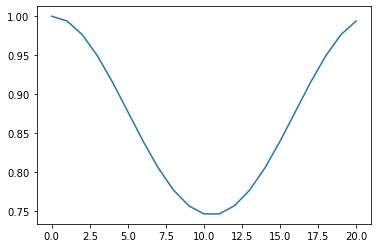

In [26]:
A= eigval_corr_matrix(N_A, Delta_array[4])
Z_n_array0 = np.array([Z_n_real(type_num, alpha_array[i], A, N_A) for i in range(N)])
plt.plot(Z_n_array0)

In [27]:
Corr_matrix_eigvals = []
for i in range(Delta_array.size):
    Corr_matrix_eigvals.append(eigval_corr_matrix(N_A, Delta_array[i]))

In [28]:
Z_n_array = []
for j in range(Delta_array.size):
    Z_n_array.append(np.array([Z_n_real(type_num, alpha_array[i], Corr_matrix_eigvals[j], N_A) for i in range(N)]))

Text(0.5, 1.0, '$\\delta$ = 1, N =21')

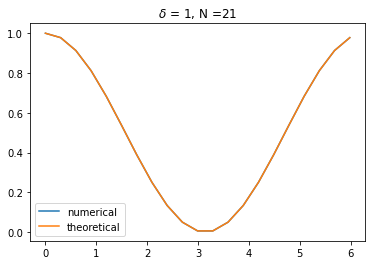

In [29]:
# For delta = 1

plt.plot(alpha_array, Z_n_array[1], label = "numerical") #numerical result 
plt.plot(alpha_array, np.cos(alpha_array/2)**2, label = "theoretical") #theoretical result
plt.legend()
plt.title("$\delta$ = 1, N =" + str(N))

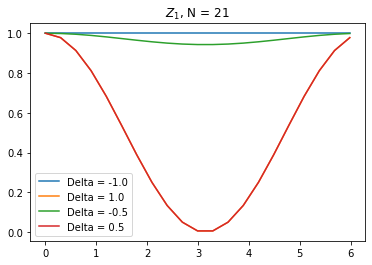

In [30]:
for i in range(4):
    plt.plot(alpha_array, Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

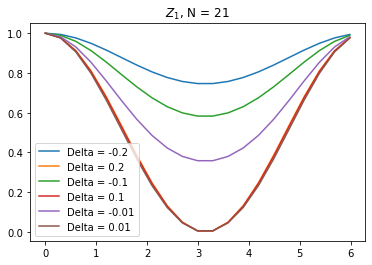

In [31]:
for i in range(4,Delta_array.size):
    plt.plot(alpha_array, Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [32]:
N_A = 20
N  = N_A + 1
typ = 2

log_Z_n_array = []
for j in range(Delta_array.size):
    log_Z_n_array.append(np.array([log_Z_n_real(typ, alpha_array[i], Corr_matrix_eigvals[j], N_A) for i in range(N)]))

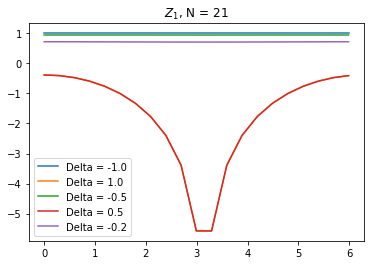

In [33]:
for i in range(Delta_array.size//2):
    plt.plot(alpha_array, log_Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

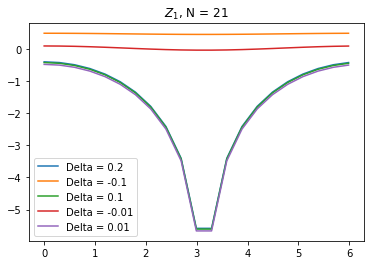

In [34]:
for i in range(Delta_array.size//2,Delta_array.size):
    plt.plot(alpha_array, log_Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [35]:
def DFT(array):
#N should be even, if N is odd, you need to change np.concatenate((array_k[N//2:N], array_k[0:N//2])
    N = array.size
    array_k = np.zeros(N)
    for k in range(N):
        for i in range(N):
            array_k[k] += (1/np.sqrt(N))*(array[i]*np.cos(2*np.pi*k*i/(N)))
    return np.concatenate((array_k[(N//2+1):N], array_k[0:(N//2+1)]))

In [36]:
def DFT_half(array):
    N = array.size
    array_k = np.zeros(N)
    for k in range(-N//2 + 1,N//2 + 1):
        array_k[k] = array[0]/(np.sqrt(N))
        for i in range(1,N//2 + 1):
            array_k[k] += 2*(1/np.sqrt(N))*(array[i]*np.cos(2*np.pi*k*i/(N)))
    return np.concatenate((array_k[(N//2+1):N], array_k[0:(N//2+1)]))

In [37]:
print("half ", DFT_half(Z_n_array[1]))
print("full",  DFT(Z_n_array[1]))

half  [-7.92280738e-17  9.07477218e-17 -1.14600170e-16 -1.30754782e-16
  1.47451495e-17 -2.31802424e-16  7.50267903e-17  8.54351312e-17
 -1.31405303e-16  1.14564392e+00  2.29128785e+00  1.14564392e+00
 -1.31405303e-16  8.54351312e-17  7.50267903e-17 -2.31802424e-16
  1.47451495e-17 -1.30754782e-16 -1.14600170e-16  9.07477218e-17
 -7.92280738e-17]
full [ 3.88578059e-16  2.77555756e-17  1.41553436e-15  2.20656826e-15
  4.51028104e-16  1.62717062e-15  1.04083409e-15  9.99200722e-16
  2.22044605e-16  1.14564392e+00  2.29128785e+00  1.14564392e+00
 -4.99600361e-16 -2.49800181e-16 -1.08246745e-15  1.87350135e-16
 -1.52655666e-16 -1.15185639e-15  3.33066907e-16 -2.77555756e-17
 -7.49400542e-16]


In [38]:
q_array = np.array([i for i in range(N)])

Text(0.5, 1.0, '$Z_1 (q)$, $N_A$ = 20')

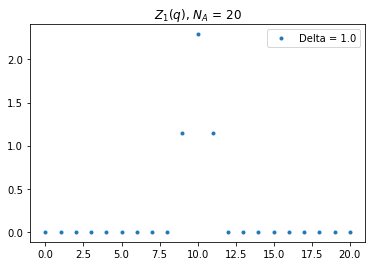

In [39]:
plt.plot(q_array, DFT_half(Z_n_array[1]),".", label = "Delta = " + str(Delta_array[1]))
plt.legend()
plt.title("$Z_1 (q)$, $N_A$ = " + str(N_A))

Z_N_array, delta = 1.0
[1.         0.9777864  0.91311939 0.8117449  0.68267051 0.53736505
 0.38873953 0.25       0.13347406 0.04951557 0.00558459 0.00558459
 0.04951557 0.13347406 0.25       0.38873953 0.53736505 0.68267051
 0.8117449  0.91311939 0.9777864 ]


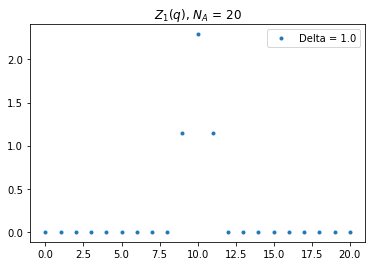

In [40]:
plt.plot(q_array, DFT(Z_n_array[1]),".", label = "Delta = " + str(Delta_array[1]))
plt.legend()
plt.title("$Z_1 (q)$, $N_A$ = " + str(N_A))
print("Z_N_array, delta = " + str(Delta_array[1]), Z_n_array[1], sep = "\n")

In [41]:
def IDFT(array):
    N = array.size
    array = np.concatenate((array[(N//2):N], array[0:(N//2)]))
    array_k = np.zeros(N)
    for k in range(0,N):
        for i in range(0,N):
            array_k[k] += (1/(np.sqrt(N)))*(array[i]*np.cos(2*np.pi*k*i/N))
    return array_k

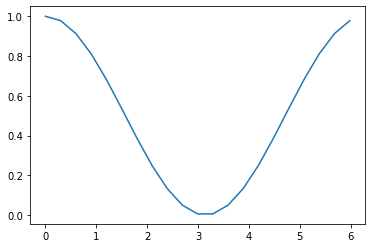

In [42]:
plt.plot(alpha_array, IDFT(DFT(Z_n_array[1])))

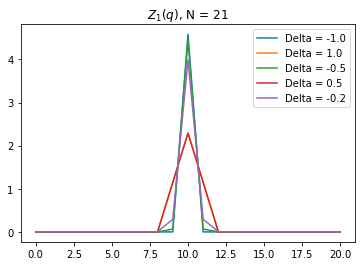

In [43]:
for i in range(Delta_array.size//2):
    plt.plot(q_array, DFT(Z_n_array[i]), label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1 (q)$, N = " + str(N))

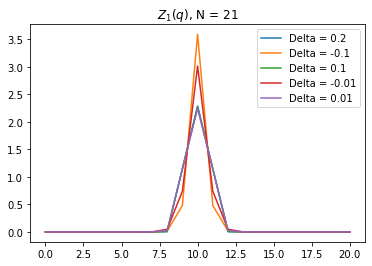

In [44]:
for i in range(Delta_array.size//2, Delta_array.size):
    plt.plot(q_array, DFT(Z_n_array[i]), label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1 (q)$, N = " + str(N))